<h3>1. Importing Libraries 📚</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

%matplotlib inline

<h3>2. Reading Dataset 👀</h3>

In [2]:
spotify = pd.read_csv('dataset.csv', index_col=0)
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


<h3>3. Checking Missing Values 🚫</h3>

In [3]:
spotify.isna().sum().sort_values(ascending=False)

album_name          1
track_name          1
artists             1
track_id            0
speechiness         0
time_signature      0
tempo               0
valence             0
liveness            0
instrumentalness    0
acousticness        0
loudness            0
mode                0
key                 0
energy              0
danceability        0
explicit            0
duration_ms         0
popularity          0
track_genre         0
dtype: int64

<h3>4. Data Preprocessing 🛠</h3>

In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [5]:
spotify.describe(percentiles=[0.1,0.9]).T

,count,mean,std,min,10%,50%,90%,max
popularity,114000.0,33.238535,22.305078,0.000,0.000000,35.000000,63.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,140080.000000,212906.000000,327773.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.328000,0.580000,0.7840,0.985
energy,114000.0,0.641383,0.251529,0.000,0.267000,0.685000,0.9410,1.000
key,114000.0,5.309140,3.559987,0.000,0.000000,5.000000,10.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-14.168100,-7.004000,-3.6790,4.532
mode,114000.0,0.637553,0.480709,0.000,0.000000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.030300,0.048900,0.1760,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.000948,0.169000,0.8670,0.996
instrumentalness,114000.0,0.156050,0.309555,0.000,0.000000,0.000042,0.8330,1.000


In [6]:
spotify.shape  

(114000, 20)

In [7]:
spotify = spotify.drop_duplicates()
spotify.shape

(113550, 20)

In [8]:
cat_col = spotify.select_dtypes(include='object').columns
cat_col

Index(['track_id', 'artists', 'album_name', 'track_name', 'track_genre'], dtype='object')

In [9]:
spotify.drop(cat_col, axis=1, inplace=True) 
print(spotify.shape)

(113550, 15)


In [10]:
spotify.isna().sum().sort_values(ascending=False)

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [11]:
def transform_value(x):
    
    for i in range(0, len(x)):
        if x[i] >= 80:
            return 1
        else:
            return 0
    
spotify['popularity'] = spotify[['popularity']].apply(transform_value, axis=1)
spotify['popularity'].value_counts()

0    112351
1      1199
Name: popularity, dtype: int64

In [12]:
spotify['target'] = spotify['popularity']
spotify.drop('popularity', axis=1, inplace=True)

In [13]:
spotify.isna().sum().sort_values(ascending=False)

duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
target              0
dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
spotify_scaled = scaler.fit_transform(spotify)

spotify_scaled = pd.DataFrame(spotify_scaled, columns=spotify.columns)
spotify_scaled.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,target
0,0.044043,0.0,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8,0.0
1,0.028566,0.0,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8,0.0
2,0.040255,0.0,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8,0.0
3,0.038557,0.0,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6,0.0
4,0.037969,0.0,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8,1.0


<h3>>5. Correlation Vizualitaion 📊</h3>

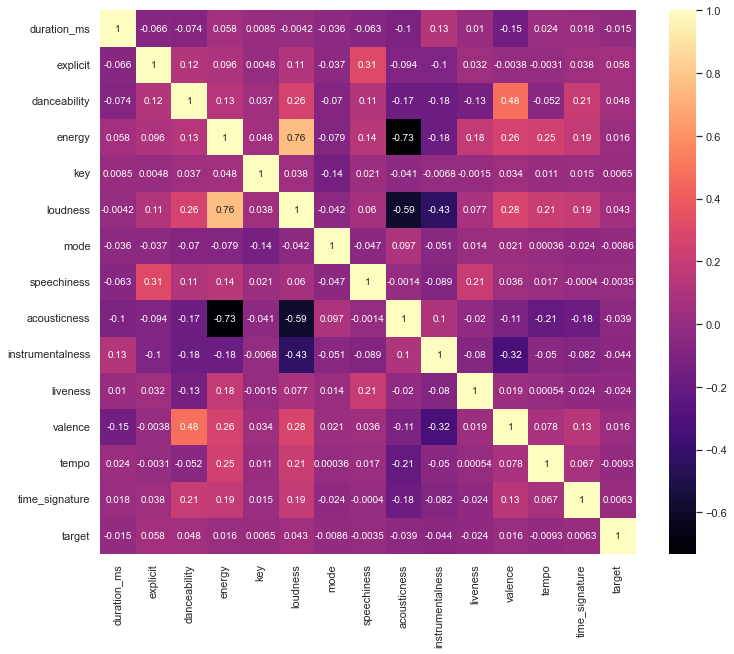

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(spotify_scaled.corr(), annot=True, cmap='magma')
plt.show()

<h3>Creating Models 🤖</h3>
<ul>
  <li>Classification Models 📈</li>
    <ol>
      <li>LogisticRegression</li>
      <li>KNearest</li>
      <li>DecisionTreeClassifier</li>
      <li>Random Forest</li>
    </ol>
</ul>


All classification models passed through resampling techniques used in the field of machine learning to deal with balancing classes in datasets.</p>

<ul>
  <li>Resampling Techniques 🐱‍👤</li>
    <ol>
      <li>Distribution - Random UnderSampling</li>
      <li>Distribution - Random Over-Sampling</li>
      <li>SMOTE (Synthetic Minority Over-sampling Technique)</li>
      <li>SMOTETomek (SMOTE with Tomek Links)</li>
    </ol>
</ul>

<h2>7. Classification Models 📈</h2>

Binary classification models are machine learning algorithms designed to solve problems where the classification task involves only two distinct classes.
<br>Because of this in the pre-processing part it was defined that only values of the 'target' column >= 80 would be considered popular.

In [16]:
spotify_scaled.head()

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,target
0,0.044043,0.0,0.686294,0.4610,0.090909,0.791392,0.0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,0.8,0.0
1,0.028566,0.0,0.426396,0.1660,0.090909,0.597377,1.0,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,0.8,0.0
2,0.040255,0.0,0.444670,0.3590,0.000000,0.736123,1.0,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,0.8,0.0
3,0.038557,0.0,0.270051,0.0596,0.000000,0.573701,1.0,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,0.6,0.0
4,0.037969,0.0,0.627411,0.4430,0.181818,0.737103,1.0,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,0.8,1.0


In [17]:
from sklearn.model_selection import StratifiedKFold

X = spotify_scaled.drop('target', axis=1)
y = spotify_scaled['target']

seed = 66
StratifKfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

for train_index, test_index in StratifKfold.split(X, y):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(), 
    "Random Forest": RandomForestClassifier()
}

<h3>7.0 Default</h3>

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

sample = []
for key, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    sample.append([key, accuracy_score(y_test, y_pred),precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred)])

df = pd.DataFrame(sample, columns=['Model','Accuracy Score','Precision Score','Recall Score','F1 Score'])
df['Details'] = ['Default','Default', 'Default', 'Default']
df

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,Details
0,LogisticRegression,0.989432,0.000000,0.000000,0.000000,Default
1,KNearest,0.988595,0.385542,0.133333,0.198142,Default
2,DecisionTreeClassifier,0.989828,0.516014,0.604167,0.556622,Default
3,Random Forest,0.995421,0.941558,0.604167,0.736041,Default


<h3>7.1 Distribution - Random UnderSampling</h3>

In this approach, a random reduction of the majority class (class with the highest number of instances) is performed to balance the distribution of classes in the data set.

In [20]:
spotify_scaled['target'].value_counts() # Target variable before resampling techniques

0.0    112351
1.0      1199
Name: target, dtype: int64

In [21]:
from imblearn.under_sampling import NearMiss

under = NearMiss()

X_under, y_under = under.fit_resample(X_train, y_train)

y_under.value_counts()

0.0    959
1.0    959
Name: target, dtype: int64

In [22]:
under_sample = []
for key, model in models.items():
    model.fit(X_under, y_under)
    y_pred = model.predict(X_under)
    under_sample.append([key, accuracy_score(y_under, y_pred),precision_score(y_under, y_pred),recall_score(y_under, y_pred),f1_score(y_under, y_pred)])

under_df = pd.DataFrame(under_sample, columns=['Model','Accuracy Score','Precision Score','Recall Score','F1 Score'])
under_df['Details'] = ['Under Sampling','Under Sampling','Under Sampling','Under Sampling']
under_df

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,Details
0,LogisticRegression,0.662148,0.691267,0.586027,0.634312,Under Sampling
1,KNearest,0.866528,0.915976,0.807091,0.858093,Under Sampling
2,DecisionTreeClassifier,0.948905,0.989761,0.907195,0.946681,Under Sampling
3,Random Forest,0.948905,0.978865,0.917623,0.947255,Under Sampling


<h3>7.2 Distribution - Random Over-Sampling</h3>

In this approach, the minority class (class with the least number of instances) is randomly augmented, creating additional copies of instances of that class.

In [23]:
from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = over.fit_resample(X_train, y_train)

y_over.value_counts()

0.0    89881
1.0    89881
Name: target, dtype: int64

In [24]:
over_sample = []
for key, model in models.items():
    model.fit(X_over, y_over)
    y_pred = model.predict(X_over)
    over_sample.append([key, accuracy_score(y_over, y_pred),precision_score(y_over, y_pred),recall_score(y_over, y_pred),f1_score(y_over, y_pred)])

over_df = pd.DataFrame(over_sample, columns=['Model','Accuracy Score','Precision Score','Recall Score','F1 Score'])
over_df['Details'] = ['Over Sampling','Over Sampling','Over Sampling','Over Sampling']
over_df

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,Details
0,LogisticRegression,0.704359,0.683868,0.760083,0.719964,Over Sampling
1,KNearest,0.948532,0.989616,0.906576,0.946278,Over Sampling
2,DecisionTreeClassifier,0.995583,0.991243,1.000000,0.995602,Over Sampling
3,Random Forest,0.995583,0.991243,1.000000,0.995602,Over Sampling


<h3>7.3 SMOTE (Synthetic Minority Over-sampling Technique) </h3>

Unlike random oversampling, SMOTE generates new synthetic instances of the minority class instead of duplicating existing instances.

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X_smote, y_smote = smote.fit_resample(X_train, y_train)

y_smote.value_counts()

0.0    89881
1.0    89881
Name: target, dtype: int64

In [26]:
smote_sample = []
for key, model in models.items():
    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_smote)
    smote_sample.append([key, accuracy_score(y_smote, y_pred),precision_score(y_smote, y_pred),recall_score(y_smote, y_pred),f1_score(y_smote, y_pred)])

smote_df = pd.DataFrame(smote_sample, columns=['Model','Accuracy Score','Precision Score','Recall Score','F1 Score'])
smote_df['Details'] = ['SMOTE','SMOTE','SMOTE','SMOTE']
smote_df

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,Details
0,LogisticRegression,0.721738,0.697499,0.783102,0.737826,SMOTE
1,KNearest,0.970700,0.970433,0.970984,0.970708,SMOTE
2,DecisionTreeClassifier,0.997257,0.995290,0.999243,0.997263,SMOTE
3,Random Forest,0.997257,0.995235,0.999299,0.997263,SMOTE


<h3>7.4 SMOTETomek</h3>

This approach aims to address class balancing by generating new synthetic instances of the minority class with SMOTE and then removing redundant or ambiguous instances using Tomek Links.

In [27]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy='minority')

X_smote_tomek, y_smote_tomek = smote_tomek.fit_resample(X_train, y_train)

y_smote_tomek.value_counts()

0.0    89879
1.0    89879
Name: target, dtype: int64

In [28]:
smote_tomek_sample = []
for key, model in models.items():
    model.fit(X_smote_tomek, y_smote_tomek)
    y_pred = model.predict(X_smote_tomek)
    smote_tomek_sample.append([key, accuracy_score(y_smote_tomek, y_pred),precision_score(y_smote_tomek, y_pred),recall_score(y_smote_tomek, y_pred),f1_score(y_smote_tomek, y_pred)])

smote_tomek_df = pd.DataFrame(smote_tomek_sample, columns=['Model','Accuracy Score','Precision Score','Recall Score','F1 Score'])
smote_tomek_df['Details'] = ['SMOTETomek','SMOTETomek','SMOTETomek','SMOTETomek']
smote_tomek_df

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,Details
0,LogisticRegression,0.723222,0.698463,0.785601,0.739474,SMOTETomek
1,KNearest,0.970249,0.970301,0.970193,0.970247,SMOTETomek
2,DecisionTreeClassifier,0.997246,0.995664,0.998843,0.997251,SMOTETomek
3,Random Forest,0.997246,0.995180,0.999332,0.997252,SMOTETomek


<h3>8. Evaluation Table 🧮</h3>

Looking into the evaluation table, Random Forest (SMOTE) is the best model.


In [29]:
final_df = pd.concat([df,under_df, over_df, smote_df, smote_tomek_df], ignore_index=True) # Concatenating all the dataframes
final_df.sort_values(by='F1 Score', ascending=False).head(3)

,Model,Accuracy Score,Precision Score,Recall Score,F1 Score,Details
15,Random Forest,0.997257,0.995235,0.999299,0.997263,SMOTE
14,DecisionTreeClassifier,0.997257,0.995290,0.999243,0.997263,SMOTE
19,Random Forest,0.997246,0.995180,0.999332,0.997252,SMOTETomek


<h3>9. Tunning the best model with RandomizedSearchCV 🚀</h3>

<strong>RandomizedSearchCV</strong> is a function of the scikit-learn package that performs a random search for the best hyperparameters of a machine learning model.<br> In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. 

In [30]:
n_estimators = [100, 200, 300]# Number of trees in random forest
max_features = ["sqrt", "log2"] # Number of features to consider at every split
max_depth = [None, 5, 10, 20] # Maximum number of levels in tree
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4] # Weights associated with classes



random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf}

<h3>9.1 Random Forest + SMOTE + RandomizedSearchCV</h3>

In [31]:
X_train_array, y_train_array = np.array(X_train), np.array(y_train)
X_test_array, y_test_array = np.array(X_test), np.array(y_test)

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

rf_grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, random_state=seed, n_iter=30, verbose=2, n_jobs=-1)

pipeline_rf = make_pipeline(SMOTE(sampling_strategy='minority'), rf_grid) # pipeline with SMOTE + Random Forest params

pipeline_rf.fit(X_train_array, y_train_array) 

best_est_rf = pipeline_rf.named_steps['randomizedsearchcv'].best_estimator_ 

prediction_rf = best_est_rf.predict(X_train_array)  

accuracy_rf = pipeline_rf.score(X_train_array, y_train_array)
precision_rf = precision_score(y_train_array, prediction_rf)
recall_rf = recall_score(y_train_array, prediction_rf)
f1_rf = f1_score(y_train_array, prediction_rf)
auc_rf = roc_auc_score(y_train_array, prediction_rf)

print('---' * 20)
print(f"Best estimators for RF: {pipeline_rf.named_steps['randomizedsearchcv'].best_params_}")
print('---' * 20)
print('Results on Train Set')
print(f"accuracy:  {accuracy_rf}")
print(f"precision: {precision_rf}")
print(f"recall:    {recall_rf}")
print(f"f1:        {f1_rf}")
print(f"auc:       {auc_rf}")
print('---' * 20)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
------------------------------------------------------------
Best estimators for RF: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
------------------------------------------------------------
Results on Train Set
accuracy:  0.9949471598414795
precision: 0.6838235294117647
recall:    0.9697601668404588
f1:        0.8020698576972833
auc:       0.9824880317074091
------------------------------------------------------------


<h3>10. Final Model</h3>
<ul>
  <li>SMOTE Models 📈</li>
    <ol>
      <li>Default Model 🤖</li>
      <li>Tuned Model 🚀</li>
    </ol>
</ul>

<h4>10.1  Default Model 🤖</h4>

In [33]:
default_rf = make_pipeline(SMOTE(sampling_strategy='minority'), RandomForestClassifier()) # SMOTE + Random Forest

default_model = default_rf.fit(X_train_array, y_train_array)
y_pred_train = default_model.predict(X_train_array) # prediction with the model trained with the training dataset

print("=== Training Results ===")
print(f"accuracy:  {accuracy_score(y_train_array, y_pred_train)}")
print(f"precision: {precision_score(y_train_array, y_pred_train)}")
print(f"recall:    {recall_score(y_train_array, y_pred_train)}")
print(f"f1:        {f1_score(y_train_array, y_pred_train)}")
print(f'auc:       {roc_auc_score(y_train_array, y_pred_train)}')
print('\n')

y_pred_test_default = default_model.predict(X_test) # prediction with the model trained with the test dataset

print("=== Test Results ===")
print(f"accuracy:  {accuracy_score(y_test, y_pred_test_default)}")
print(f"precision: {precision_score(y_test, y_pred_test_default)}")
print(f"recall:    {recall_score(y_test, y_pred_test_default)}")
print(f"f1:        {f1_score(y_test, y_pred_test_default)}")
print(f'auc:       {roc_auc_score(y_test, y_pred_test_default)}')

=== Training Results ===
accuracy:  0.9952994275649494
precision: 0.7
recall:    0.9708029197080292
f1:        0.8134556574923548
auc:       0.9831818583809557


=== Test Results ===
accuracy:  0.9903126376045794
precision: 0.5331125827814569
recall:    0.6708333333333333
f1:        0.5940959409594094
auc:       0.8322791499777482


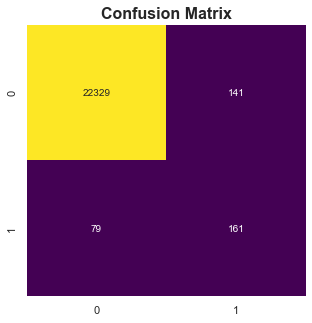

In [34]:
from sklearn.metrics import confusion_matrix

# confusion matrix for the test dataset (default model)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_test_default), annot=True, cmap='viridis', fmt='g', cbar=False)
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.show()

<h3>10.2 Tuned Model 🚀</h3>

In [35]:
final_params = rf_grid.best_estimator_

pipe_final = make_pipeline(SMOTE(sampling_strategy='minority'), final_params) # SMOTE + Random Forest
final_model = pipe_final.fit(X_train_array, y_train_array)

y_pred_train = final_model.predict(X_train_array) # prediction with the model trained with the training dataset


print("=== Training Results ===")
print(f"accuracy:  {accuracy_score(y_train_array, y_pred_train)}")
print(f"precision: {precision_score(y_train_array, y_pred_train)}")
print(f"recall:    {recall_score(y_train_array, y_pred_train)}")
print(f"f1:        {f1_score(y_train_array, y_pred_train)}")
print(f'auc:       {roc_auc_score(y_train_array, y_pred_train)}')
print('\n')

y_pred_test_final = final_model.predict(X_test) # prediction with the model trained with the test dataset


print("=== Test Results ===")
print(f"accuracy:  {accuracy_score(y_test, y_pred_test_final)}")
print(f"precision: {precision_score(y_test, y_pred_test_final)}")
print(f"recall:    {recall_score(y_test, y_pred_test_final)}")
print(f"f1:        {f1_score(y_test, y_pred_test_final)}")
print(f'auc:       {roc_auc_score(y_test, y_pred_test_final)}')

=== Training Results ===
accuracy:  0.9949471598414795
precision: 0.6838235294117647
recall:    0.9697601668404588
f1:        0.8020698576972833
auc:       0.9824880317074091


=== Test Results ===
accuracy:  0.9901365037428446
precision: 0.5264900662251656
recall:    0.6625
f1:        0.5867158671586716
auc:       0.82806797952826


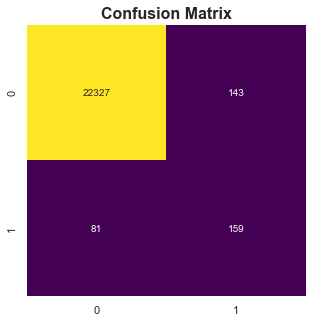

In [36]:
# confusion matrix for the final model (test dataset)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred_test_final), annot=True, cmap='viridis', fmt='g', cbar=False)
plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.show()
